In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
path = 'C:\\Users\\Peter\\Desktop\\Thinkful\\Thinkful-Lessons\\Thinkful 4.2\\bostonmarresults2013.csv'

df = pd.read_csv(path)

In [5]:
df.head()

,25k,age,name,division,10k,gender,half,official,bib,ctz,...,overall,pace,state,30k,5k,genderdiv,20k,35k,city,40k
0,49.87,28,"Cassidy, Josh R.",9,18.18,M,40.93,90.90,W1,NaN,...,9,3.47,ON,62.07,8.90,9,38.80,74.73,Toronto,85.55
1,77.27,30,"Korir, Wesley",5,30.90,M,64.90,132.50,1,NaN,...,5,5.07,NaN,92.97,15.90,5,61.52,108.78,Kenya,124.77
2,77.23,23,"Desisa, Lelisa",1,30.90,M,64.92,130.37,2,NaN,...,1,4.98,NaN,92.72,15.93,1,61.53,108.68,Ambo,123.78
3,50.50,32,"Fearnley, Kurt H.",5,18.73,M,42.00,88.43,W2,NaN,...,5,3.38,NaN,61.35,8.98,5,39.88,73.00,Hamilton,83.43
4,48.75,39,"Hokinoue, Kota",3,18.18,M,40.57,87.22,W3,NaN,...,3,3.33,NaN,59.92,8.92,3,38.55,71.68,Iizuka,81.88


In [6]:
df.columns

Index(['25k', 'age', 'name', 'division', '10k', 'gender', 'half', 'official',
       'bib', 'ctz', 'country', 'overall', 'pace', 'state', '30k', '5k',
       'genderdiv', '20k', '35k', 'city', '40k'],
      dtype='object')

In [7]:
df.shape

(16164, 21)

In [8]:
print(100 * df.isnull().sum()/len(df))#identify columns in data that are null

25k           0.000000
age           0.000000
name          0.000000
division      0.000000
10k           0.000000
gender        0.000000
half          0.000000
official      0.000000
bib           0.000000
ctz          95.316753
country       0.000000
overall       0.000000
pace          0.000000
state         9.050977
30k           0.000000
5k            0.000000
genderdiv     0.000000
20k           0.000000
35k           0.000000
city          0.006187
40k           0.000000
dtype: float64


In [9]:
df2 = df[['5k','10k', '20k','half','25k', '30k', '35k','40k', 'overall', 'division','genderdiv','age', 'gender',  'official',
        'country', 'pace', 'state',  
          'city']]

df2.head()

,5k,10k,20k,half,25k,30k,35k,40k,overall,division,genderdiv,age,gender,official,country,pace,state,city
0,8.90,18.18,38.80,40.93,49.87,62.07,74.73,85.55,9,9,9,28,M,90.90,CAN,3.47,ON,Toronto
1,15.90,30.90,61.52,64.90,77.27,92.97,108.78,124.77,5,5,5,30,M,132.50,KEN,5.07,NaN,Kenya
2,15.93,30.90,61.53,64.92,77.23,92.72,108.68,123.78,1,1,1,23,M,130.37,ETH,4.98,NaN,Ambo
3,8.98,18.73,39.88,42.00,50.50,61.35,73.00,83.43,5,5,5,32,M,88.43,AUS,3.38,NaN,Hamilton
4,8.92,18.18,38.55,40.57,48.75,59.92,71.68,81.88,3,3,3,39,M,87.22,JPN,3.33,NaN,Iizuka


In [10]:
times = ['5k','10k', '20k','half','25k', '30k', '35k','40k']

for time in times:
    df2 = df2[df2[time] != '-']
    df2[time] = df2[time].astype(float)

In [18]:
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AffinityPropagation
import numpy as np

In [21]:
import time

_start_time = time.time()

def tic():
    global _start_time 
    _start_time = time.time()

def tac():
    t_sec = round(time.time() - _start_time)
    (t_min, t_sec) = divmod(t_sec,60)
    (t_hour,t_min) = divmod(t_min,60) 
    print('Time passed: {}hour:{}min:{}sec'.format(t_hour,t_min,t_sec))


In [33]:
df2['last5pace'] = (df2['40k']-df2['35k'])/5
df2['mid5pace'] = (df2['25k']-df2['half'])/5
df2['first5pace'] = df2['5k']/5

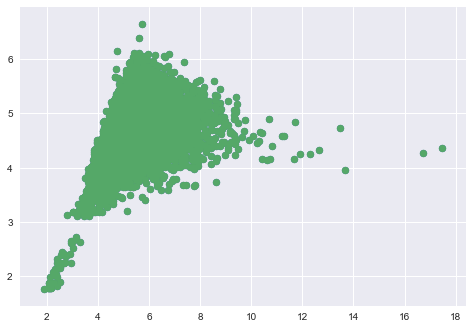

In [29]:
plt.scatter(df2['last5pace'], df2['first5pace'])
plt.show()

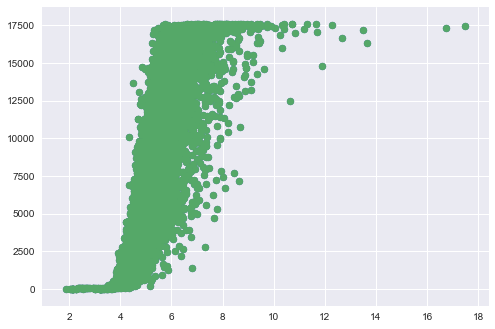

In [31]:
plt.scatter(df2['last5pace'], df2['overall'])
plt.show()

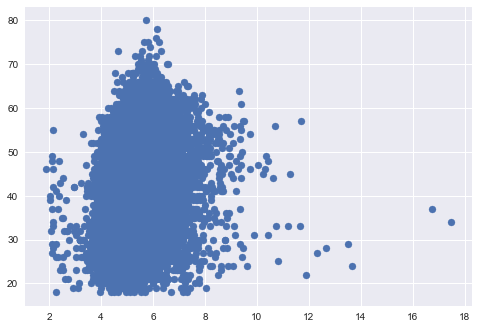

In [32]:
plt.scatter(df2['last5pace'], df2['age'])
plt.show()

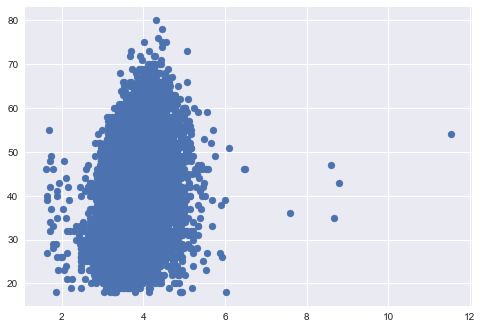

In [34]:
plt.scatter(df2['mid5pace'], df2['age'])
plt.show()

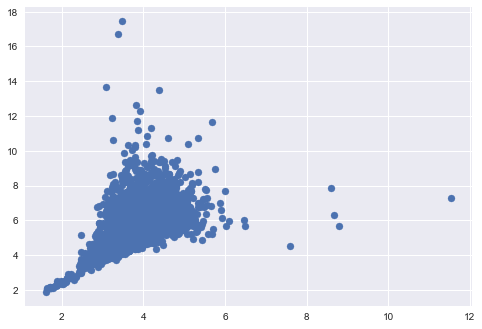

In [35]:
plt.scatter(df2['mid5pace'], df2['last5pace'])
plt.show()

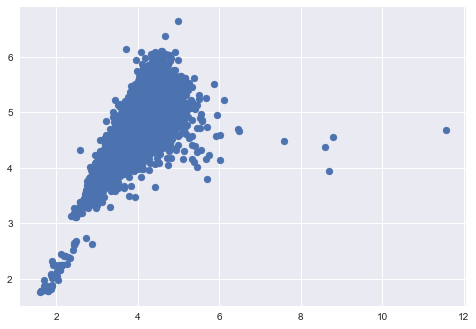

In [36]:
plt.scatter(df2['mid5pace'], df2['first5pace'])
plt.show()

In [37]:
tic()
ms = MeanShift()
ms.fit(df2[['mid5pace', 'first5pace']])

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))
tac()

Number of estimated clusters: 6
Time passed: 0hour:14min:45sec


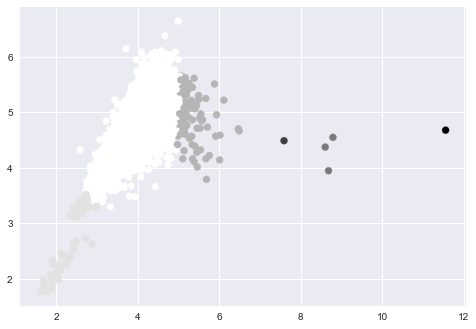

In [39]:
ms_ = ms.fit_predict(df2[['mid5pace', 'first5pace']])

#Graph results.
plt.scatter(df2['mid5pace'], df2['first5pace'], c=ms_)
plt.show()

In [40]:
tic()
# Declare and fit the model.
sc = SpectralClustering(n_clusters=6)

#Predicted clusters.
predict=sc.fit_predict(df2[['mid5pace', 'first5pace']])

#Graph results.
plt.scatter(df2['mid5pace'], df2['first5pace'], c=predict)
plt.show()
tac()

MemoryError: 